In [0]:
!nvidia-smi

Sat Jun  6 12:23:43 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
!pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html 
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version

Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
Requirement already up-to-date: torch==1.5 in /usr/local/lib/python3.6/dist-packages (1.5.0+cu101)
Requirement already up-to-date: torchvision==0.6 in /usr/local/lib/python3.6/dist-packages (0.6.0+cu101)
     |████████████████████████████████| 276kB 8.7MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp36-cp36m-linux_x86_64.whl size=44074 sha256=6c1ccb1ff97a4ba717ec472f919d7b071c98f7650790579bbf254ff5f168d5d2
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-bx8d2k4a
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-bx8d2k4a
  Created wheel for pycocotools: filename=pycocotools-2.0-cp36-cp36m-lin

In [0]:
!pip install detectron2==0.1.3 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html
     |████████████████████████████████| 6.2MB 640kB/s 
     |████████████████████████████████| 276kB 16.9MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.1.post20200606-cp36-none-any.whl size=41026 sha256=61fb1fa251a0bb1483c43b31fa12479b9fc68159c6baa85b61d7c256a1b3ec76
  Stored in directory: /root/.cache/pip/wheels/fd/10/ba/9799b6e863d32be6b2f15235e4c10aaba5b9ed84a5b679b430
  Created wheel for pyyaml: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=44621 sha256=55f89b3ca01739fc50fe87f1fcb4c05c88a596289b7b0880ab216a291cee866c
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully built fvcore pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [0]:
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -q -e detectron2_repo

Cloning into 'detectron2_repo'...
remote: Enumerating objects: 99, done.
remote: Counting objects: 100% (99/99), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 5236 (delta 42), reused 54 (delta 30), pack-reused 5137
Receiving objects: 100% (5236/5236), 2.57 MiB | 7.61 MiB/s, done.
Resolving deltas: 100% (3722/3722), done.


KeyboardInterrupt: ignored

In [2]:
#import torch, torchvision
import glob 
import os
import numpy as np
import cv2
import random
import itertools
import pandas as pd
from tqdm import tqdm
import urllib
import json
import PIL.Image as Image

'''import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog'''

ModuleNotFoundError: No module named 'cv2'

In [0]:
import detectron2
from detectron2 import model_zoo
from detectron2.utils.logger import setup_logger
setup_logger
from detectron2.engine import DefaultPredictor, DefaultTrainer
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer, ColorMode
from detectron2.data import DatasetCatalog, MetadataCatalog, build_detection_test_loader
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.structures import BoxMode

In [0]:
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
import matplotlib as rc

%matplotlib inline
%config Inline.Backend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
!unzip image_data.zip 

Archive:  image_data.zip
   creating: image_data/
  inflating: image_data/face_0.jpeg  
  inflating: image_data/face_1.jpeg  
  inflating: image_data/face_10.jpeg  
  inflating: image_data/face_100.jpeg  
  inflating: image_data/face_101.jpeg  
  inflating: image_data/face_102.jpeg  
  inflating: image_data/face_103.jpeg  
  inflating: image_data/face_104.jpeg  
  inflating: image_data/face_105.jpeg  
  inflating: image_data/face_106.jpeg  
  inflating: image_data/face_107.jpeg  
  inflating: image_data/face_108.jpeg  
  inflating: image_data/face_109.jpeg  
  inflating: image_data/face_11.jpeg  
  inflating: image_data/face_110.jpeg  
 extracting: image_data/face_111.jpeg  
  inflating: image_data/face_112.jpeg  
  inflating: image_data/face_113.jpeg  
  inflating: image_data/face_114.jpeg  
  inflating: image_data/face_115.jpeg  
  inflating: image_data/face_116.jpeg  
  inflating: image_data/face_117.jpeg  
  inflating: image_data/face_118.jpeg  
  inflating: image_data/face_119.jpe

In [0]:
df = pd.read_csv('/content/labels_data.csv')
df.head()

,file_name,width,height,x_min,y_min,x_max,y_max,class_name
0,images (12).jpeg,318,159,141,23,226,131,maskon
1,images (129).jpeg,259,194,116,57,156,112,maskon
2,face_140.jpeg,538,330,92,54,168,171,maskoff
3,images (266).jpeg,266,189,152,52,245,173,maskon
4,images (72).jpeg,246,205,68,37,115,97,maskon


In [0]:
df.file_name.unique()[4]

'images (72).jpeg'

In [0]:
def annotate_image(annotations, resize=True):
  file_name = annotations.file_name.to_numpy()[0]
  img = cv2.cvtColor(cv2.imread(f'/content/image_data/{file_name}'),cv2.COLOR_BGR2RGB)
  for i, a in annotations.iterrows():
    cv2.rectangle(img, (a.x_min, a.y_min), (a.x_max, a.y_max),(0, 255 ,0),2 )
  if not resize:
    return img
  return cv2.resize(img,(384,384), interpolation = cv2.INTER_AREA)

(-0.5, 298.5, 167.5, -0.5)

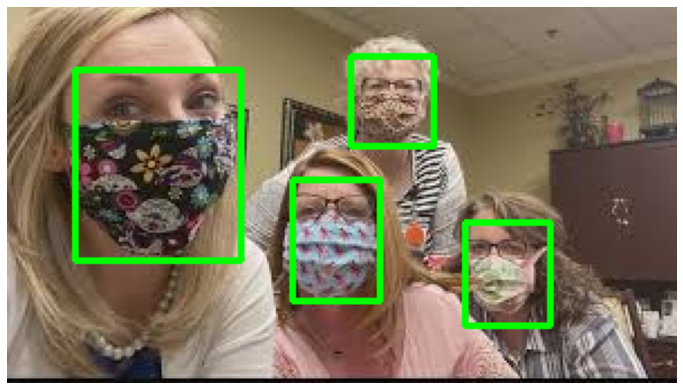

In [0]:
img_df = df[df.file_name== df.file_name.unique()[11]]
img = annotate_image(img_df,resize =False)
plt.imshow(img)
plt.axis('off')

(-0.5, 537.5, 329.5, -0.5)

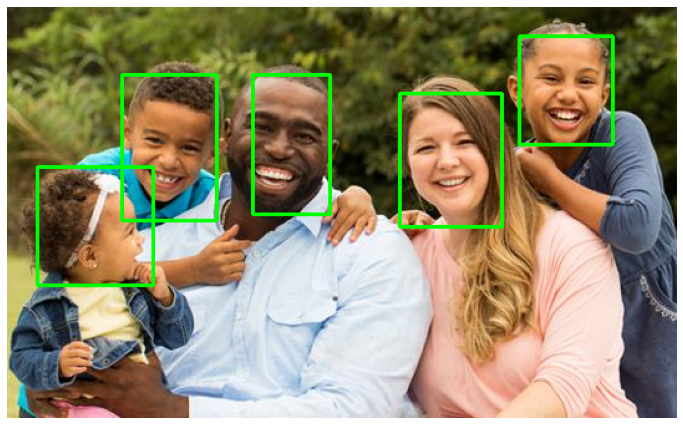

In [0]:
img_df = df[df.file_name== df.file_name.unique()[2]]
img = annotate_image(img_df,resize =False)
plt.imshow(img)
plt.axis('off')

(-0.5, 259.5, 193.5, -0.5)

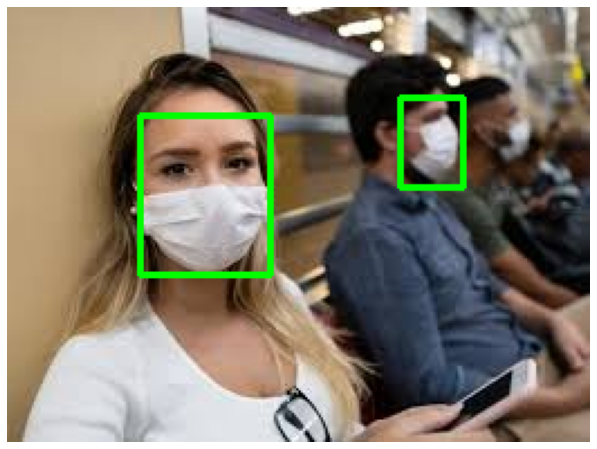

In [0]:
img_df = df[df.file_name== 'image (22).jpeg']
img = annotate_image(img_df,resize =False)
plt.imshow(img)
plt.axis('off')

(168, 300, 3)


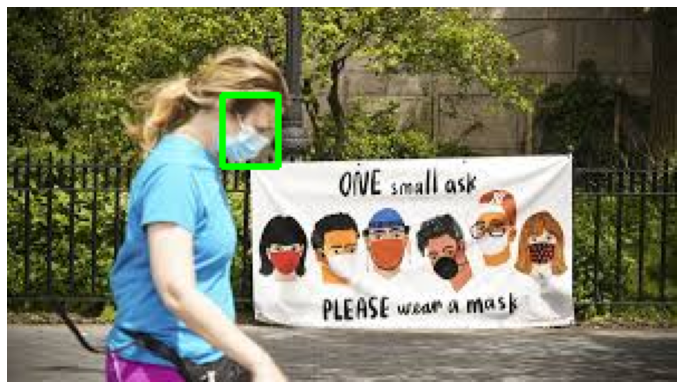

In [0]:
img_df = df[df.file_name== df.file_name.unique()[144]]
img = annotate_image(img_df,resize =False)
plt.imshow(img)
plt.axis('off')
print(np.array(img).shape)

In [0]:
unique_files = df.file_name.unique()

train = set(
    np.random.choice(unique_files, int(len(unique_files)*0.95),replace =False)
)

In [0]:
train_df = df[df.file_name.isin(train)]
test_df = df[~df.file_name.isin(train)]

In [0]:
print(train_df.shape[0])
print(test_df.shape[0])


956
46


In [0]:
classes = df.class_name.unique().tolist()

In [0]:
def create_dataset_dicts(df, classes):
  dataset_dicts = []
  for img_id, img_name in enumerate(df.file_name.unique()):
    record = {}

    image_df = df[df.file_name == img_name]
    file_path = f'/content/image_data/{img_name}'
    record['file_name'] = file_path
    record['image_id'] = img_id 
    record['height'] = int(image_df.iloc[0].height)
    record['width'] = int(image_df.iloc[0].width)

    objs = []
    for _, row in image_df.iterrows():
      xmin = int(row.x_min)
      ymin = int(row.y_min)
      xmax = int(row.x_max)
      ymax = int(row.y_max)

      poly = [(xmin,ymin),(xmax,ymin),(xmax,ymax),(xmin,ymax)]
      poly = list(itertools.chain.from_iterable(poly))
      obj = {
        "bbox": [xmin, ymin, xmax, ymax],
        "bbox_mode": BoxMode.XYXY_ABS,
        "segmentation": [poly],
        "category_id": classes.index(row.class_name),
        "iscrowd": 0
      }
      objs.append(obj)

    record["annotations"] = objs
    dataset_dicts.append(record)
  return dataset_dicts


In [0]:
for d in ["train", "val"]:
  DatasetCatalog.register("faces_" + d, lambda d=d: create_dataset_dicts(train_df if d == "train" else test_df, classes))
  MetadataCatalog.get("faces_" + d).set(thing_classes=classes)

statement_metadata = MetadataCatalog.get("faces_train")

In [0]:
class CocoTrainer(DefaultTrainer):
  
  @classmethod
  def build_evaluator(cls, cfg, dataset_name, output_folder=None):

    if output_folder is None:
        os.makedirs("coco_eval", exist_ok=True)
        output_folder = "coco_eval"

    return COCOEvaluator(dataset_name, cfg, False, output_folder)

In [0]:
cfg = get_cfg()

cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))

cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")


In [0]:
cfg.DATASETS.TRAIN = ("faces_train",)
cfg.DATASETS.TEST = ("faces_val",)
cfg.DATALOADER.NUM_WORKERS = 4

In [0]:
cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.001
cfg.SOLVER.WARMUP_ITERS = 1000
cfg.SOLVER.MAX_ITER = 1500
cfg.SOLVER.STEPS = (1000, 1500)
cfg.SOLVER.GAMMA = 0.05

In [0]:
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 64
cfg.MODEL.ROI_HEADS.NUM_CLASSES = len(classes)

cfg.TEST.EVAL_PERIOD = 500

In [0]:
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

trainer = CocoTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

[06/06 12:26:42 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res


model_final_f10217.pkl: 0.00B [00:00, ?B/s]
model_final_f10217.pkl:   0%|          | 8.19k/178M [00:01<6:52:56, 7.18kB/s]
model_final_f10217.pkl:   0%|          | 41.0k/178M [00:01<4:54:09, 10.1kB/s]
model_final_f10217.pkl:   0%|          | 106k/178M [00:01<3:28:24, 14.2kB/s] 
model_final_f10217.pkl:   0%|          | 246k/178M [00:01<2:26:58, 20.1kB/s]
model_final_f10217.pkl:   0%|          | 524k/178M [00:01<1:43:20, 28.6kB/s]
model_final_f10217.pkl:   1%|          | 1.06M/178M [00:02<1:12:25, 40.7kB/s]
model_final_f10217.pkl:   1%|          | 2.16M/178M [00:02<50:32, 57.9kB/s]  
model_final_f10217.pkl:   2%|▏         | 4.26M/178M [00:02<35:01, 82.6kB/s]
model_final_f10217.pkl:   4%|▎         | 6.34M/178M [00:02<24:18, 118kB/s] 
model_final_f10217.pkl:   5%|▍         | 8.37M/178M [00:02<16:53, 167kB/s]
model_final_f10217.pkl:   6%|▌         | 10.3M/178M [00:03<11:46, 237kB/s]
model_final_f10217.pkl:   7%|▋         | 12.4M/178M [00:03<08:13, 336kB/s]
model_final_f10217.pkl:   8%|▊    

[06/06 12:27:10 d2.engine.train_loop]: Starting training from iteration 0
[06/06 12:27:29 d2.utils.events]:  eta: 0:23:49  iter: 19  total_loss: 2.703  loss_cls: 1.203  loss_box_reg: 0.567  loss_mask: 0.689  loss_rpn_cls: 0.085  loss_rpn_loc: 0.015  time: 0.9546  data_time: 0.0471  lr: 0.000020  max_mem: 4986M
[06/06 12:27:49 d2.utils.events]:  eta: 0:24:02  iter: 39  total_loss: 2.293  loss_cls: 0.929  loss_box_reg: 0.617  loss_mask: 0.661  loss_rpn_cls: 0.060  loss_rpn_loc: 0.018  time: 0.9773  data_time: 0.0119  lr: 0.000040  max_mem: 4986M
[06/06 12:28:10 d2.utils.events]:  eta: 0:24:14  iter: 59  total_loss: 2.031  loss_cls: 0.693  loss_box_reg: 0.652  loss_mask: 0.610  loss_rpn_cls: 0.044  loss_rpn_loc: 0.016  time: 1.0033  data_time: 0.0195  lr: 0.000060  max_mem: 4986M
[06/06 12:28:31 d2.utils.events]:  eta: 0:24:02  iter: 79  total_loss: 1.865  loss_cls: 0.571  loss_box_reg: 0.623  loss_mask: 0.559  loss_rpn_cls: 0.045  loss_rpn_loc: 0.018  time: 1.0122  data_time: 0.0226  lr:

In [0]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.85
predictor = DefaultPredictor(cfg)

In [0]:
evaluator = COCOEvaluator("faces_val", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "faces_val")
inference_on_dataset(trainer.model, val_loader, evaluator)

[06/06 12:57:22 d2.data.common]: Serializing 26 elements to byte tensors and concatenating them all ...
[06/06 12:57:22 d2.data.common]: Serialized dataset takes 0.01 MiB
[06/06 12:57:22 d2.evaluation.evaluator]: Start inference on 26 images
[06/06 12:57:24 d2.evaluation.evaluator]: Inference done 11/26. 0.1249 s / img. ETA=0:00:02
[06/06 12:57:26 d2.evaluation.evaluator]: Total inference time: 0:00:02.990493 (0.142404 s / img per device, on 1 devices)
[06/06 12:57:26 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:02 (0.122743 s / img per device, on 1 devices)
[06/06 12:57:26 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[06/06 12:57:26 d2.evaluation.coco_evaluation]: Saving results to ./output/coco_instances_results.json
[06/06 12:57:26 d2.evaluation.coco_evaluation]: Evaluating predictions ...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE 

OrderedDict([('bbox',
              {'AP': 30.86361754483517,
               'AP-maskoff': 14.797694398044623,
               'AP-maskon': 46.929540691625725,
               'AP50': 72.72294228508227,
               'AP75': 24.349867561672927,
               'APl': 25.89147763522066,
               'APm': 35.65911505045084,
               'APs': 16.618811881188115}),
             ('segm',
              {'AP': 32.050337808137094,
               'AP-maskoff': 14.895808921147816,
               'AP-maskon': 49.20486669512637,
               'AP50': 71.84854783367265,
               'AP75': 31.119490232412073,
               'APl': 25.16097266904758,
               'APm': 37.48352344674025,
               'APs': 18.36963696369637})])

In [0]:
os.makedirs("annotated_results", exist_ok=True)

test_image_paths = test_df.file_name.unique()

In [0]:
import ntpath
for clothing_image in test_image_paths:
  file_path = f'image_data/{clothing_image}'
  im = cv2.imread(file_path)
  outputs = predictor(im)
  v = Visualizer(
    im[:, :, ::-1],
    metadata=statement_metadata, 
    scale=1., 
    instance_mode=ColorMode.IMAGE
  )
  instances = outputs["instances"].to("cpu")
  instances.remove('pred_masks')
  v = v.draw_instance_predictions(instances)
  result = v.get_image()[:, :, ::-1]
  file_name = ntpath.basename(clothing_image)
  write_res = cv2.imwrite(f'annotated_results/{file_name}', result)

In [0]:
annotated_images = [f'annotated_results/{f}' for f in test_df.file_name.unique()]

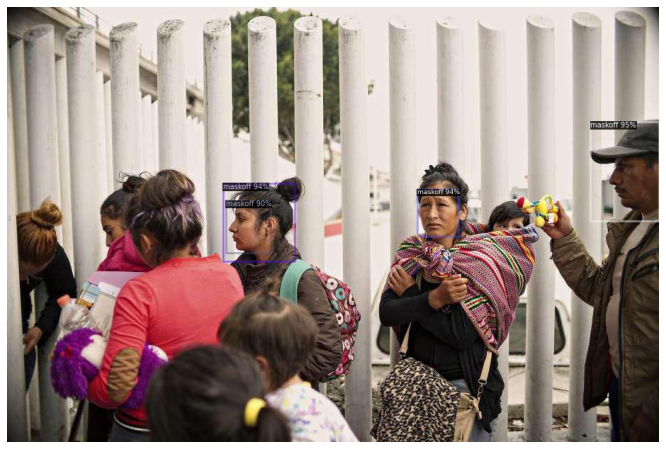

In [0]:
img = cv2.cvtColor(cv2.imread(annotated_images[8]), cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis('off');